In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Data Importation and Exploration
# Loading and previewing our dataset

nba_df = pd.read_csv('https://bit.ly/NBARookiesDs')
nba_df.head()

Name  GP   MIN  PTS  FGM  ...  AST  STL  BLK  TOV  TARGET_5Yrs
0   Brandon Ingram  36  27.4  7.4  2.6  ...  1.9  0.4  0.4  1.3          0.0
1  Andrew Harrison  35  26.9  7.2  2.0  ...  3.7  1.1  0.5  1.6          0.0
2   JaKarr Sampson  74  15.3  5.2  2.0  ...  1.0  0.5  0.3  1.0          0.0
3      Malik Sealy  58  11.6  5.7  2.3  ...  0.8  0.6  0.1  1.0          1.0
4      Matt Geiger  48  11.5  4.5  1.6  ...  0.3  0.3  0.4  0.8          1.0

[5 rows x 21 columns]

In [ ]:
#checking the shape
nba_df.shape

(1340, 21)

In [ ]:
# #deleting the Name column
nba_df = nba_df.drop('Name', 1)

In [ ]:
#Checking and dropping duplicates
nba_df.duplicated().sum()
# nba_df2 =nba_df.drop_duplicates()

12

In [ ]:
# Determining the size ouf our data set
nba_df.shape

(1340, 20)

In [ ]:
nba_df.dtypes #Confirmed all our data is either an integer or float

GP               int64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3P Made        float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
TARGET_5Yrs    float64
dtype: object

**Prepare our Data for Training**

In [ ]:
#Checking for Nulls
nba_df.isnull().sum()

GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [ ]:
# Replace the missing data with the mean
nba_df['3P%'] = nba_df['3P%'].fillna(nba_df['3P%'].mean())

In [ ]:
#confirming no nulls
nba_df.isna().sum()

GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

In [ ]:
# Preparing our dataset for training
# X = nba_df.iloc[:, :-1].values  
# y = nba_df.iloc[:, 20].values          
features = nba_df.iloc[:, :-1].values # Independent/predictor variables
target= nba_df.iloc[:, :18].values # Dependent/label variable

In [ ]:
#Checking for unique values

cols = nba_df.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique variables:", nba_df[col].nunique())
    print(nba_df[col].unique())
    print()

Variable: GP
Number of unique variables: 70
[36 35 74 58 48 75 62 65 42 40 27 45 44 49 41 82 80 76 61 32 52 78 51 64
 55 34 77 72 69 54 24 50 56 67 38 37 46 19 79 81 70 33 73 47 63 15 68 39
 31 25 43 59 66 60 71 57 21 53 29 23 28 12 11 30 22 26 18 20 14 16]

Variable: MIN
Number of unique variables: 325
[27.4 26.9 15.3 11.6 11.5 11.4 10.9 10.3  9.9  8.5  6.9  6.7  6.6  6.4
  6.1  5.3  4.2 37.2 31.4 30.5 30.3 29.6 15.2 29.3 24.6 22.5 22.  20.7
 20.3 19.6 18.9 13.4 18.6 18.4 17.  16.9 15.1 14.9 14.8 14.5 13.2 12.4
 11.8 11.3 10.6  9.6  9.   8.7  8.2  7.3  4.8  4.3 37.7 13.1 35.2 33.5
 28.5 25.9 25.4 23.7  9.2 22.6 20.6 20.5 19.5 19.3 16.5 16.2 16.1 15.4
 14.3 13.6 13.3 12.5 11.9 10.8 11.2 11.  10.1 10.   9.8  9.5  9.3  7.
  6.8  6.2  5.8 36.6 10.7 33.7 33.6 31.5 30.2 30.  25.3 25.1 23.  21.7
 20.1 19.1 18.  17.9 16.8 10.4 15.9 14.  13.8 13.  12.9 34.5 21.2  9.4
  8.8 30.4  8.6  8.3 32.3  7.7  6.5  5.7  4.9  4.1 34.4 33.8 31.1 32.6
 29.7 28.1 27.6 27.1 26.1 26.7 22.2 21.1 18.5 19.  18.2 1

In [ ]:
#ensuring our target variable is a categorical variable and not a numerical variable.
nba_df['TARGET_5Yrs'] = nba_df['TARGET_5Yrs'].replace({0. : '0', 1. : '1'}).astype('object')
nba_df['TARGET_5Yrs'].dtype

dtype('O')

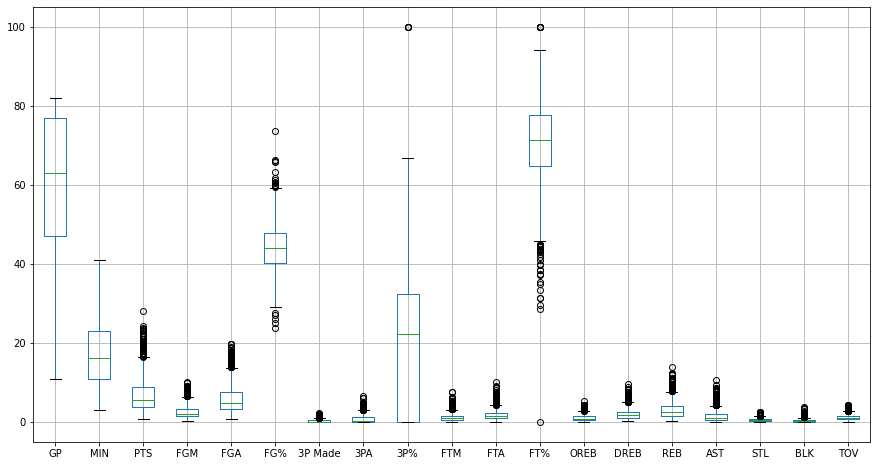

In [ ]:
# visualizing the outliers
plt.figure(figsize = (15, 8))
nba_df.boxplot()
plt.show()

In [ ]:
# getting the records with outliers
q1 = nba_df.quantile(0.25)
q3 = nba_df.quantile(0.75)
iqr = q3 - q1

outliers_df = nba_df[((nba_df < (q1 - 1.5 * iqr)) | (nba_df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(3)

(349, 20)


GP   MIN   PTS  FGM   FGA   FG%  ...  REB  AST  STL  BLK  TOV  TARGET_5Yrs
597   60  20.7   7.9  3.5   5.7  60.8  ...  7.6  0.5  1.0  1.6  0.9            1
166   71  30.4  16.3  6.1  12.4  49.5  ...  6.5  1.5  1.0  1.3  2.1            1
1137  80  22.6  10.2  3.5   7.6  45.2  ...  5.6  1.0  0.6  0.4  2.0            1

[3 rows x 20 columns]

In [ ]:
# calculating percentage of outliers
round((outliers_df.shape[0] / nba_df.shape[0]) * 100, 2)

26.04

26% is a significant number thus we shall not drop the outliers

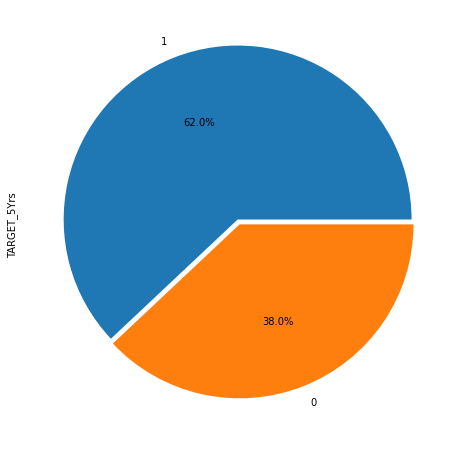

In [ ]:
# pie chart showing the distribution of our target variable
plt.figure(figsize = (8, 8))
nba_df.TARGET_5Yrs.value_counts().plot(kind = 'pie', autopct = '%1.1f%%', explode = (0.03, 0))
plt.show()

In [ ]:
nba_df.dtypes

GP               int64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3P Made        float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
TARGET_5Yrs     object
dtype: object

62% of the players have had a career length of over 5 years 38% have less than 5 yrs

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

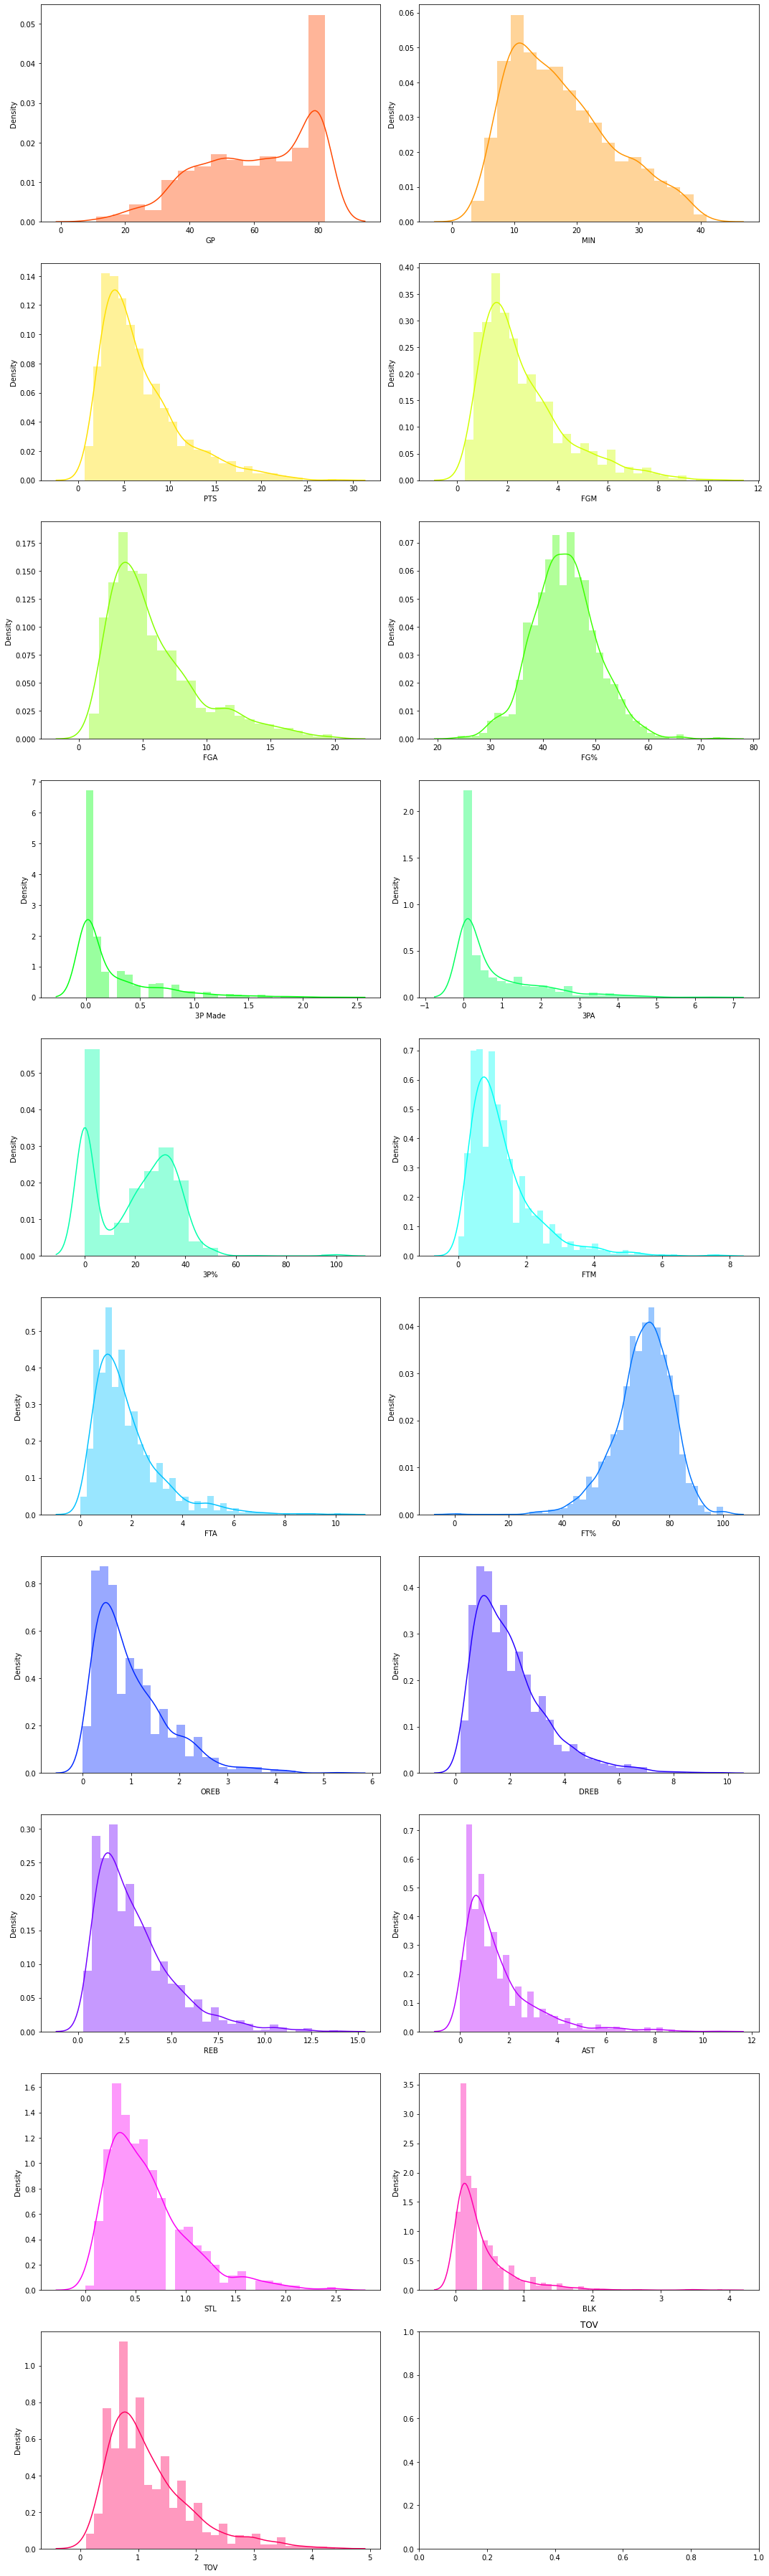

In [ ]:
# histogram showing the distribution of the variables
num_cols = nba_df.columns.to_list()
num_cols.remove('TARGET_5Yrs')
num_cols

colors = sns.color_palette("hsv", len(num_cols))
number_rows = round(len(num_cols) / 2)

fig, axes = plt.subplots(nrows = number_rows, ncols = 2, figsize = (15, 50))

for col, color, ax in zip(num_cols, colors, axes.flatten()):
    sns.distplot(nba_df[col], color = color, ax = ax)
    plt.title(col)
    
plt.tight_layout()

Our target variable's values are disproportionate, with value 1 exceeding value 0 by 24%.

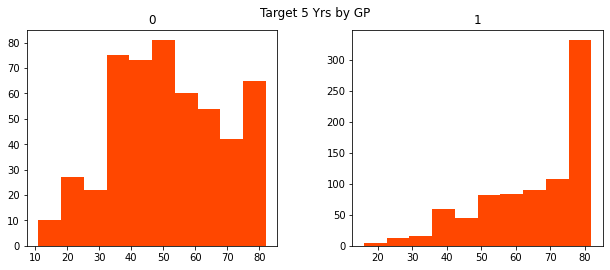

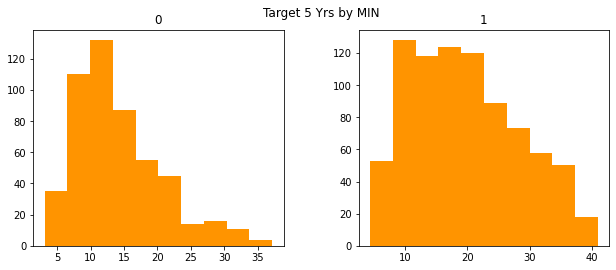

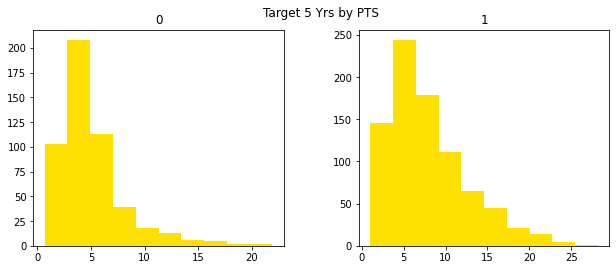

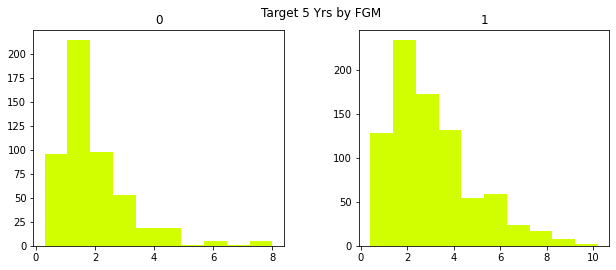

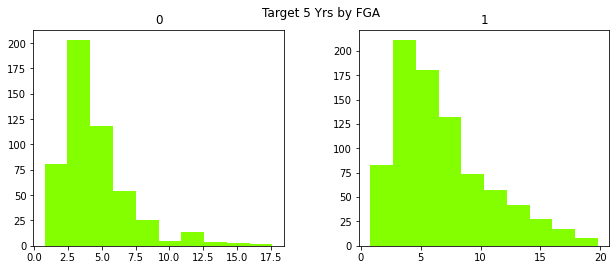

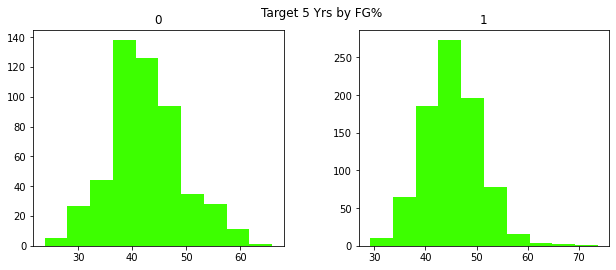

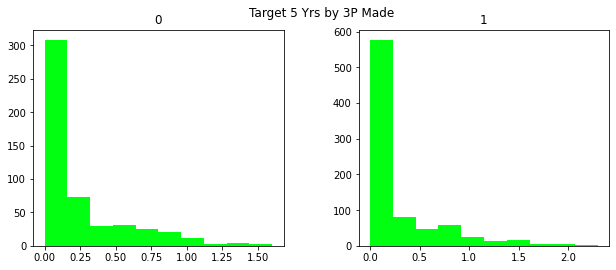

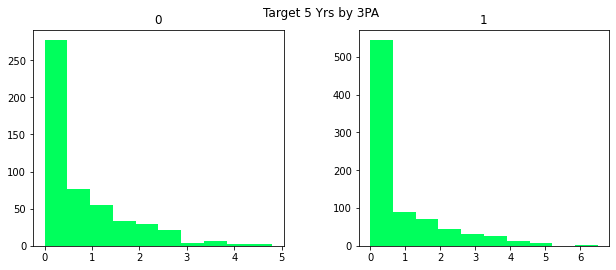

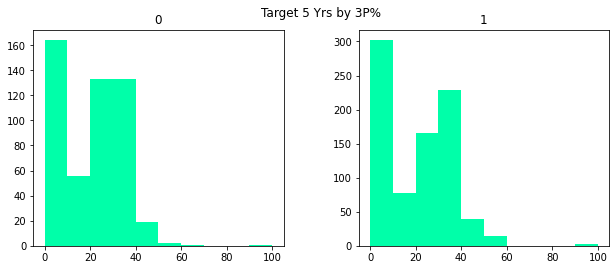

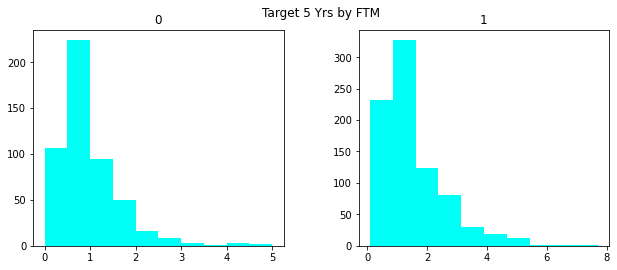

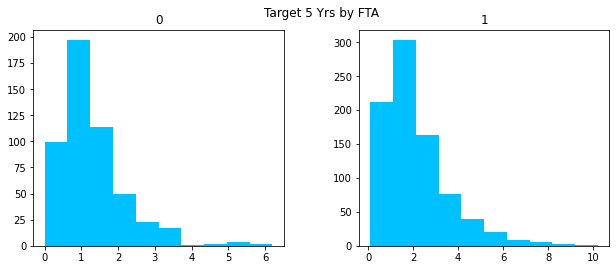

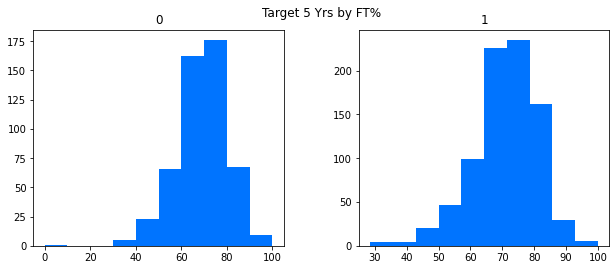

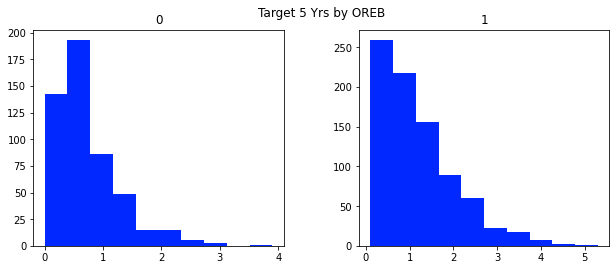

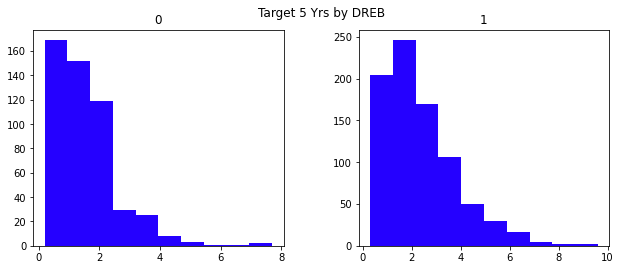

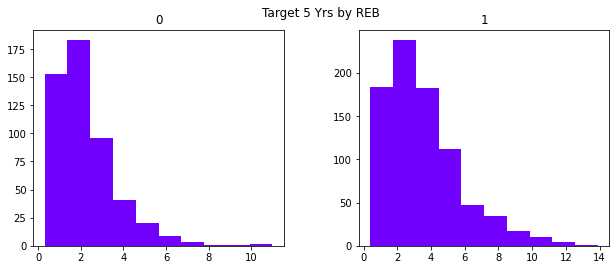

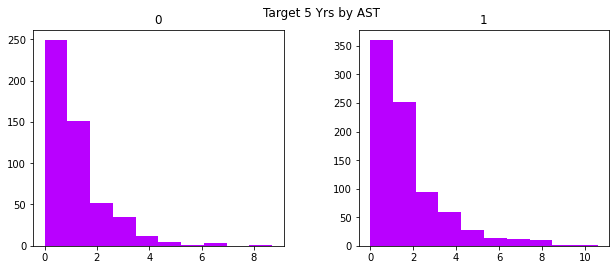

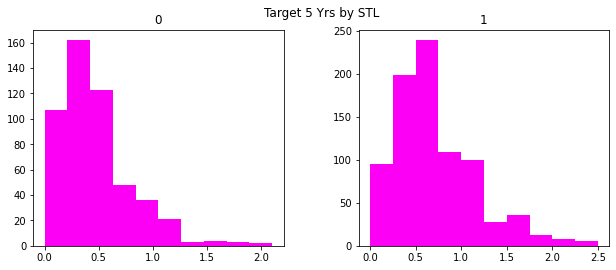

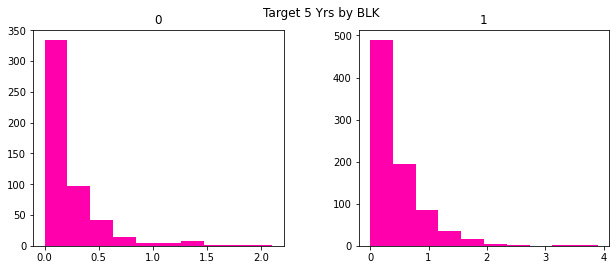

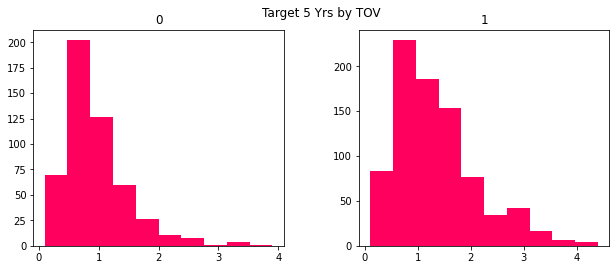

In [ ]:
# getting the distribution of the other variable per the target variables
colors = sns.color_palette('hsv', len(num_cols))

for col, color in zip(num_cols, colors):
    nba_df.hist(col, by = 'TARGET_5Yrs', color = color, rot = 0, figsize = (10, 4))
    plt.suptitle("Target 5 Yrs by {}".format(col))
    plt.show()

To summarize the above distributions:
* those whose career lengths are less than 5 have a wider spread of games played, compared to those whose career lengths exceeded 5 where the most frequent number of games is over 75
* those whose career lengths are less than 5 ,on average, played fewer minutes than those whose career lengths exceeded 5
* those whose career lengths are less than 5 scored fewer points per game than those whose career lengths exceeded 5 
* those whose career lengths are less than 5 made and attempted fewer field goals than those whose career lengths exceeded 5 
* those whose career lengths are less than 5 made and attempted more 3-points than those whose career lengths exceeded 5 
* those whose career lengths are less than 5 made and attempted fewer free throws than those whose career lengths exceeded 5 
* those whose career lengths are less than 5 made fewer offensive rebounds, defensive rebounds, and rebounds than those whose career lengths exceeded 5 
* in terms of assists, steals, and blocks, there doesn't appear to be much significant difference between those whose career lengths are less than 5 and those whose career lengths exceeded 5
* those whose career lengths are less than 5 made fewer turnovers than those whose career lengths exceeded 5 

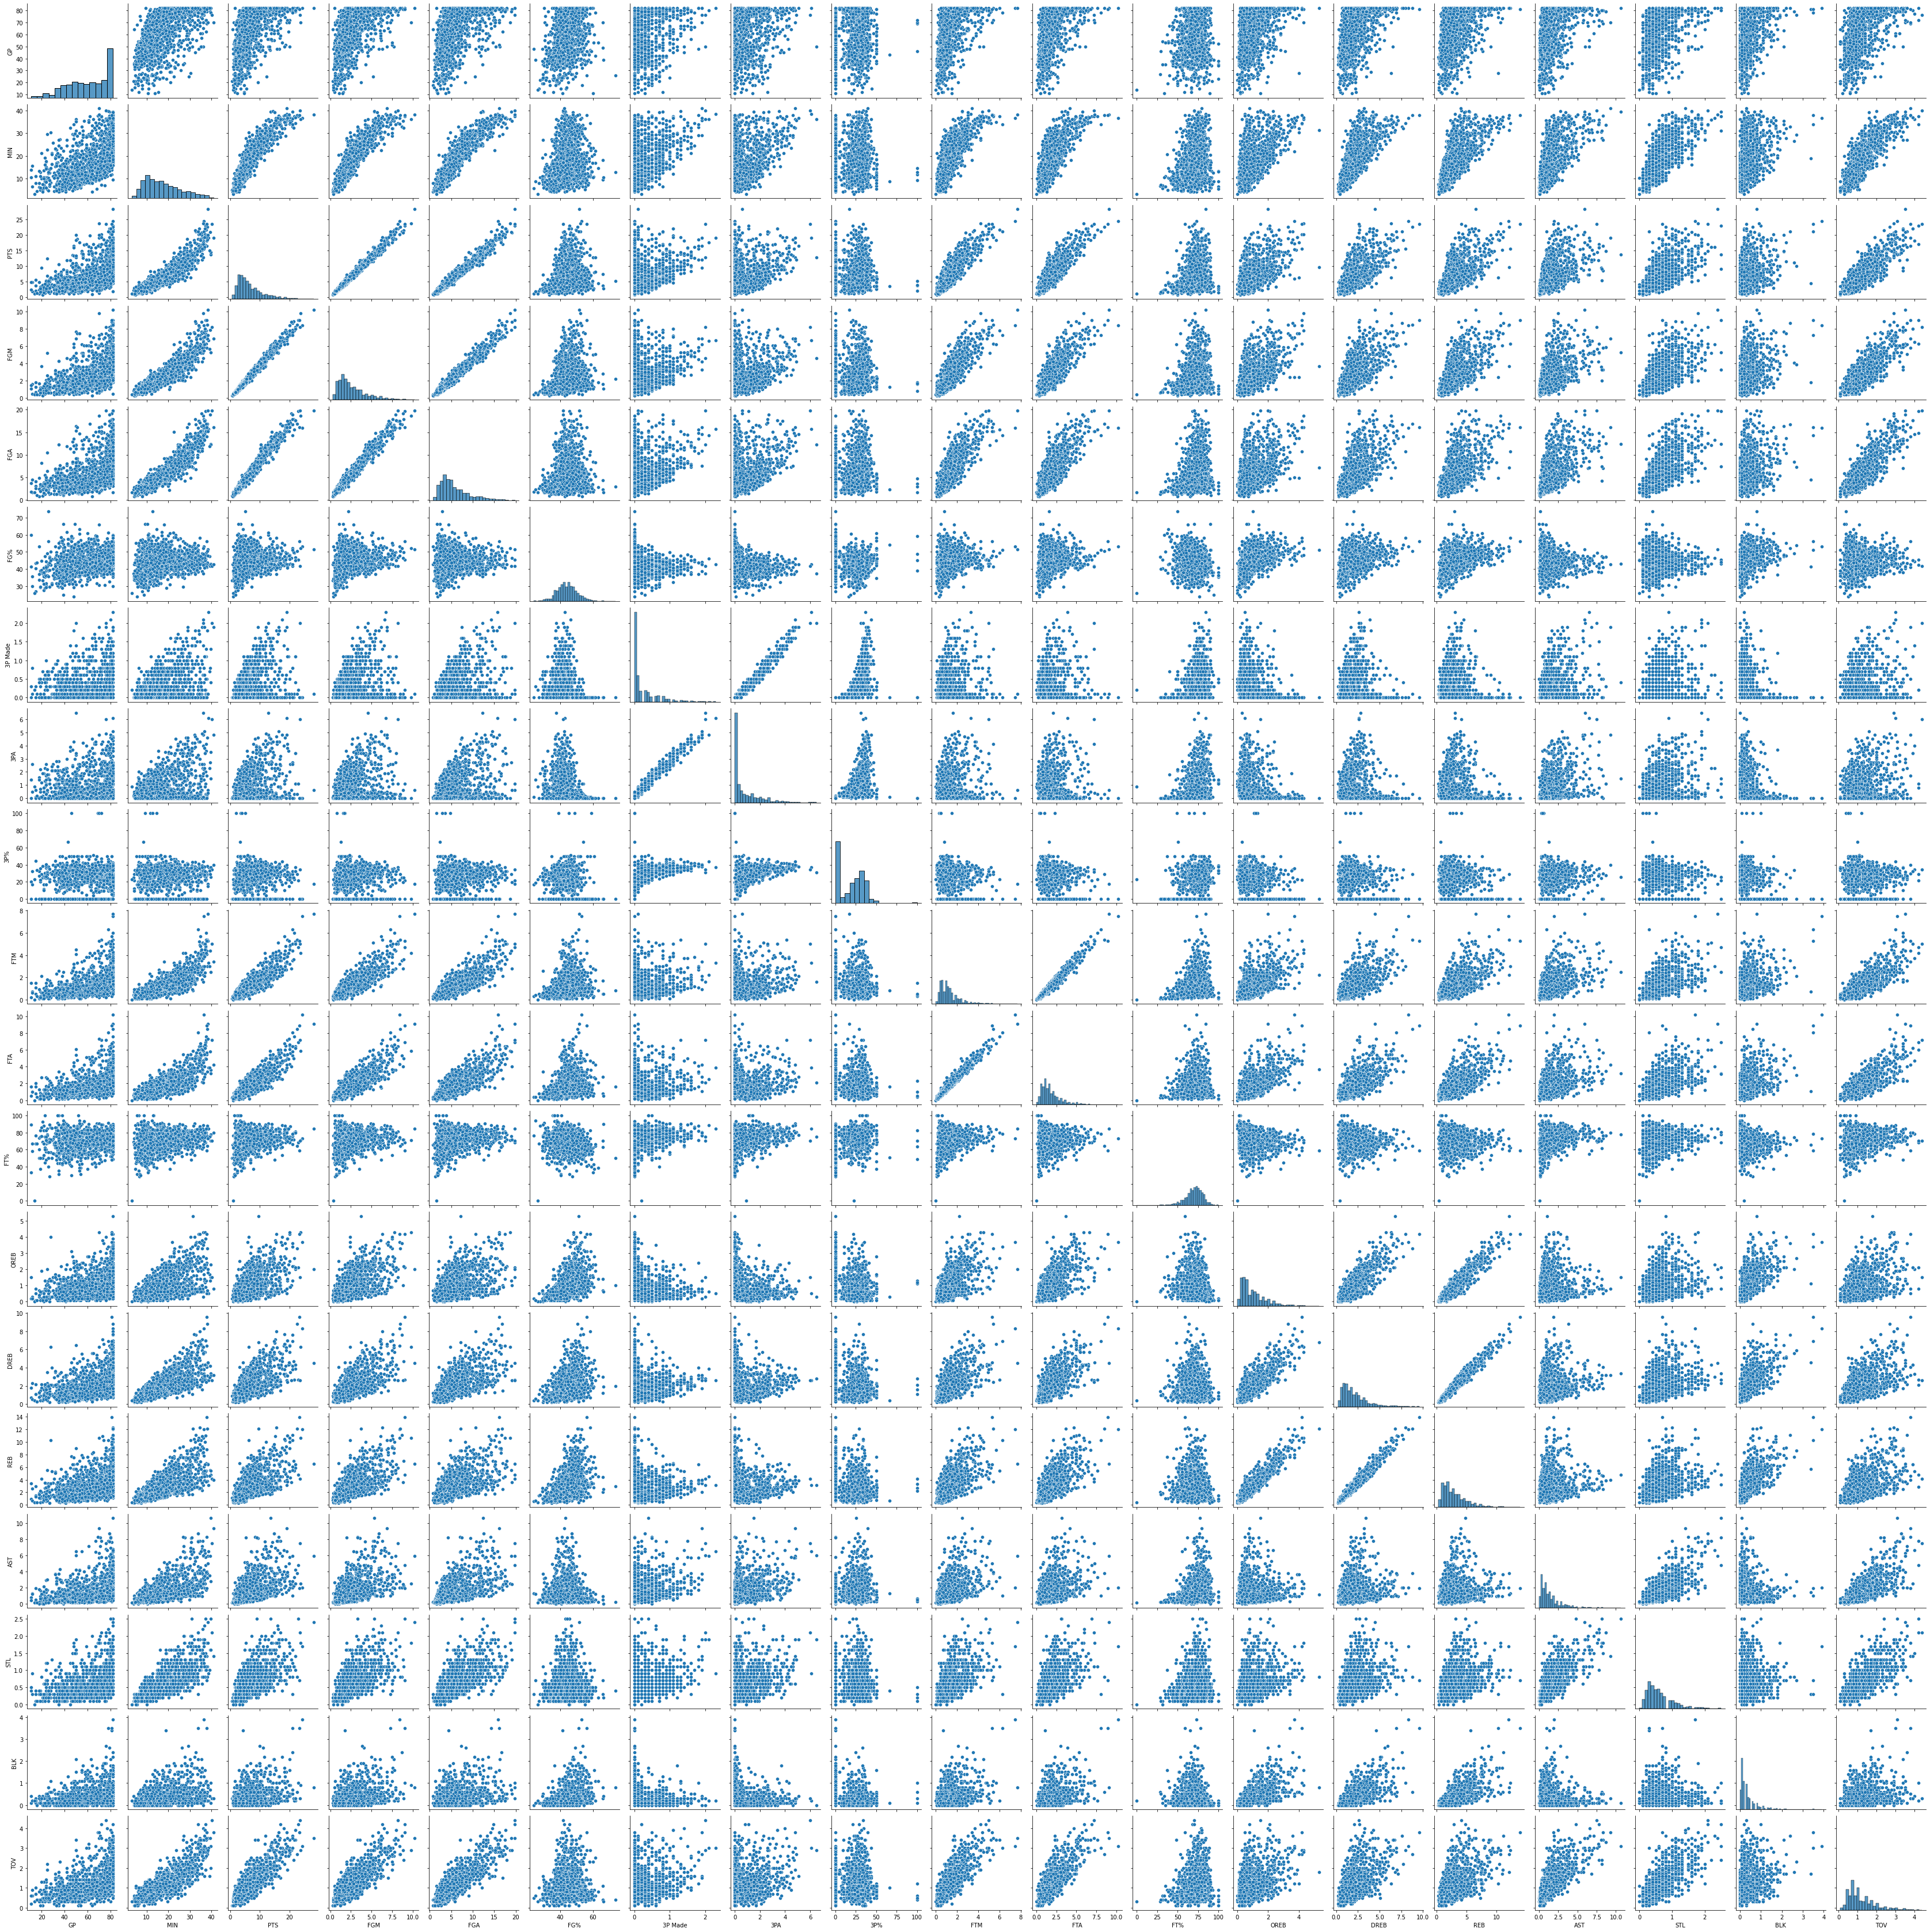

In [ ]:
# generate a pairplot so we can see how the numerical variables relate to one another
sns.pairplot(nba_df)

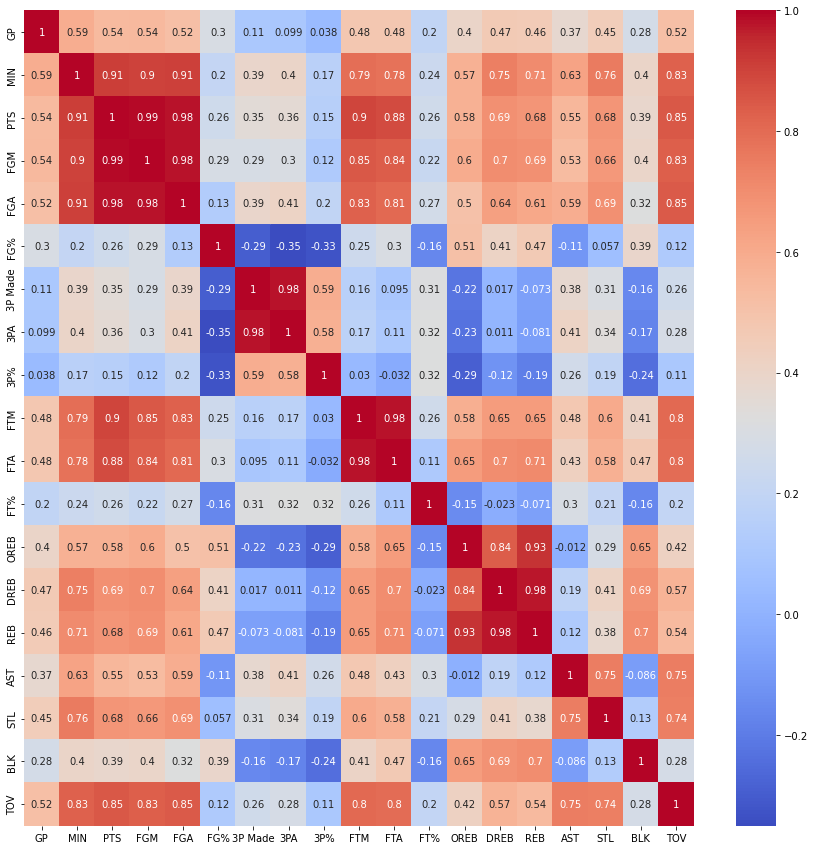

In [ ]:
# visualizing the correlations between the variables
corr = nba_df.corr()

plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

**4. Data Modeling**

In [ ]:
nba_df.head()

GP   MIN  PTS  FGM  FGA   FG%  ...  REB  AST  STL  BLK  TOV  TARGET_5Yrs
0  36  27.4  7.4  2.6  7.6  34.7  ...  4.1  1.9  0.4  0.4  1.3            0
1  35  26.9  7.2  2.0  6.7  29.6  ...  2.4  3.7  1.1  0.5  1.6            0
2  74  15.3  5.2  2.0  4.7  42.2  ...  2.2  1.0  0.5  0.3  1.0            0
3  58  11.6  5.7  2.3  5.5  42.6  ...  1.9  0.8  0.6  0.1  1.0            1
4  48  11.5  4.5  1.6  3.0  52.4  ...  2.5  0.3  0.3  0.4  0.8            1

[5 rows x 20 columns]

In [ ]:
# split into features (X) and label (Y)

features = nba_df.iloc[:, [1, 2 ,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values  # Independent/predictor variables
target = nba_df.iloc[:, 19].values          # Dependent/label variable
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.3, random_state = 0)

In [ ]:
# Performing normalisation
# We then perform feature scaling / normalisation to scale our data between 0 and 1 so as to get better accuracy.
from sklearn.preprocessing import MinMaxScaler  
norm = MinMaxScaler().fit(features_train) 
features_train = norm.transform(features_train) 
features_test = norm.transform(features_test)

Implementation and Evaluation

In [ ]:
#Normalisation and feature scaling
from sklearn.preprocessing import MinMaxScaler  
norm = MinMaxScaler().fit(features_train) 
features_train = norm.transform(features_train) 
features_test = norm.transform(features_test)

#Model imported and intialised

In [ ]:
from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier     # Decision Tree Classifier
from sklearn.svm import SVC                         # SVM Classifier
from sklearn.naive_bayes import GaussianNB          # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier

# We will also use our ensemble classifiers
from sklearn.ensemble import BaggingClassifier           # Bagging Meta-Estimator Classifier
from sklearn.ensemble import RandomForestClassifier      # RandomForest Classifier 
from sklearn.ensemble import AdaBoostClassifier          # AdaBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier  # AdaBoost GradientBoostingClassifier
import xgboost as xgb                                    # Importing the XGBoost library

Setting Up Classifiers

In [ ]:
logistic_classifier = LogisticRegression()
decision_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
naive_classifier = GaussianNB() 

# We start implementing ensemble methods by first using Bagging Classifiers
# ---
# Uncomment each classifier and run the respective code
# ---
bagging_meta_classifier = BaggingClassifier()
random_forest_classifier = RandomForestClassifier()

# Boosting Classifiers
# ---
ada_boost_classifier = AdaBoostClassifier()
gbm_classifier = GradientBoostingClassifier() 
xg_boost_classifier = xgb.XGBClassifier() 

# Now using these classifiers to fit our data, features_train and target_train.
# By fitting we mean we train our classifiers based on the train dataset.
# ---
# Upon running this cell, we should have classifiers that can predict 
# whether a person will buy a car or not.
# ---
#
logistic_classifier.fit(features_train, target_train)
decision_classifier.fit(features_train, target_train)
svm_classifier.fit(features_train, target_train)
knn_classifier.fit(features_train, target_train)
naive_classifier.fit(features_train, target_train)

# Bagging Classifiers
# ---
bagging_meta_classifier.fit(features_train, target_train)
random_forest_classifier.fit(features_train, target_train)

# Boosting Classifiers
# ---
ada_boost_classifier.fit(features_train, target_train)
gbm_classifier.fit(features_train, target_train)
xg_boost_classifier.fit(features_train,target_train)

XGBClassifier()

In [ ]:
# fitting our classifiers to the training data
logistic_classifier.fit(features_train, target_train)
decision_classifier.fit(features_train, target_train)
svm_classifier.fit(features_train, target_train)
knn_classifier.fit(features_train, target_train)
naive_classifier.fit(features_train, target_train)

# Bagging Classifiers
# ---
bagging_meta_classifier.fit(features_train, target_train)
random_forest_classifier.fit(features_train, target_train)

# Boosting Classifiers
# ---
ada_boost_classifier.fit(features_train, target_train)
gbm_classifier.fit(features_train, target_train)
xg_boost_classifier.fit(features_train, target_train)

XGBClassifier()

In [ ]:
# making predictions on the test data

logistic_y_prediction = logistic_classifier.predict(features_test) 
decision_y_prediction = decision_classifier.predict(features_test) 
svm_y_prediction = svm_classifier.predict(features_test) 
knn_y_prediction = knn_classifier.predict(features_test) 
naive_y_prediction = naive_classifier.predict(features_test) 

# Bagging Classifiers
# ---
bagging_y_classifier = bagging_meta_classifier.predict(features_test) 
random_forest_y_classifier = random_forest_classifier.predict(features_test) 

# Boosting Classifiers
# ---
ada_boost_y_classifier = ada_boost_classifier.predict(features_test)
gbm_y_classifier = gbm_classifier.predict(features_test)
xg_boost_y_classifier = xg_boost_classifier.predict(features_test)

In [ ]:
# assessing the performance of our classifiers via accuracy scores and confusion matrices

from sklearn.metrics import classification_report, accuracy_score 

print("Logistic Regression Classifier", accuracy_score(logistic_y_prediction, target_test))
print("Decision Trees Classifier", accuracy_score(decision_y_prediction, target_test))
print("SVN Classifier", accuracy_score(svm_y_prediction, target_test))
print("KNN Classifier", accuracy_score(knn_y_prediction, target_test))
print("Naive Bayes Classifier", accuracy_score(naive_y_prediction, target_test))

# Bagging Classifiers
# ---
print("Bagging Classifier", accuracy_score(bagging_y_classifier, target_test))
print("Random Forest Classifier", accuracy_score(random_forest_y_classifier, target_test))

# Boosting Classifiers
# ---
print("Ada Boost Classifier", accuracy_score(ada_boost_y_classifier, target_test))
print("GBM Classifier", accuracy_score(gbm_y_classifier, target_test))
print("XGBoost Classifier", accuracy_score(xg_boost_y_classifier, target_test))

Logistic Regression Classifier 0.6716417910447762
Decision Trees Classifier 0.6169154228855721
SVN Classifier 0.6666666666666666
KNN Classifier 0.6467661691542289
Naive Bayes Classifier 0.6890547263681592
Bagging Classifier 0.6467661691542289
Random Forest Classifier 0.6840796019900498
Ada Boost Classifier 0.664179104477612
GBM Classifier 0.6865671641791045
XGBoost Classifier 0.6741293532338308


**Findings**

Naive Bayes was the most accurate classifier.

**Recommendations**

While it seems like recruiting players who have potential to have their careers last more than 5 years is the quickest and easiest solution to implement, management should consider the benefits of adding players with career lengths less than 5 years. The benefits of doing such include:

they tend to attempt and make more 3-points than those whose career lengths exceed 5 years
they play more games than those whose career lengths exceed 5 years. These two strengths of those whose careers are less than 5 years old means that there are high chances of them scoring more points given proper training.
To conclude, I recommend that management goes after the following players, regardless of their career length:

those who have played at least 30 games
those who play at least 15 minutes
those who score at least 5 points per game
those who make at least 1 field goal
those who attempt at least 3 field goals
those who can make and attempt at least 1 3-point
those who can make and attempt at least 1 free throw